 # Building a Classification Model 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

##  Load the dataset from a CSV file and Check shape, size, Discriptive Statistics and data type of each column

In [2]:
# Load the dataset from a CSV file
df = pd.read_csv('customer_data.csv')

# Display the first few rows of the dataset
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [3]:
# Summary statistics
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [4]:
# Check shape and size of data
df.shape

(7043, 21)

In [5]:
# Check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check for duplicate rows values

In [6]:
# Check for duplicate rows values
df.duplicated().sum()

0

## Check for missing values

In [7]:
# Check for missing values
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Missing Value Treatment

In [8]:
# Replace missing value in Total Charges with median (more robust)

df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
## Since Total Charges is numerical column 


In [9]:
# Again Check for missing values
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Churn Distribution (Class Balance) :
* Check if the dataset is imbalanced

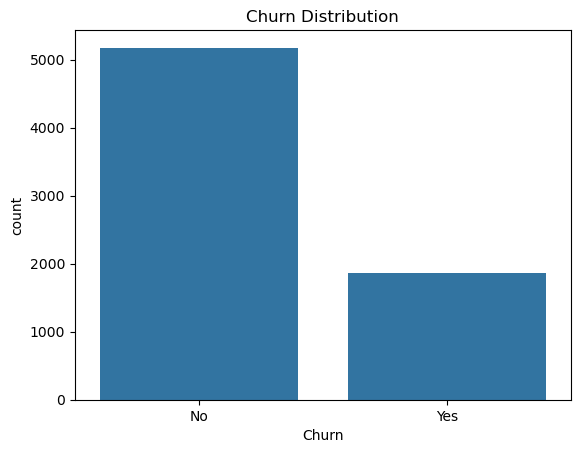

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

## Churn vs. Categorical Features

#### Churn vs. Contract


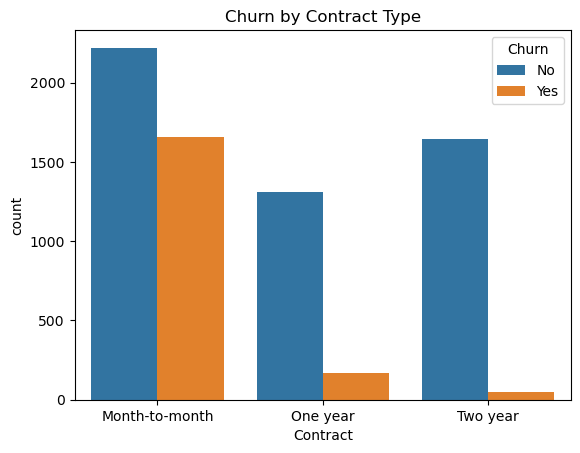

In [11]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.show()


####  Churn vs. InternetService

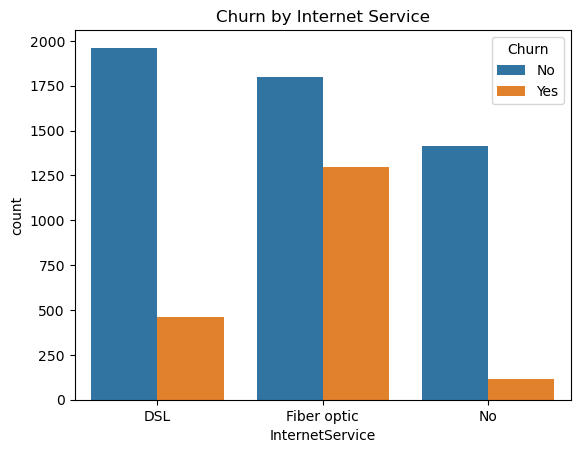

In [12]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()


## Churn vs. Numerical Features

#### Tenure distribution for churned vs non-churned


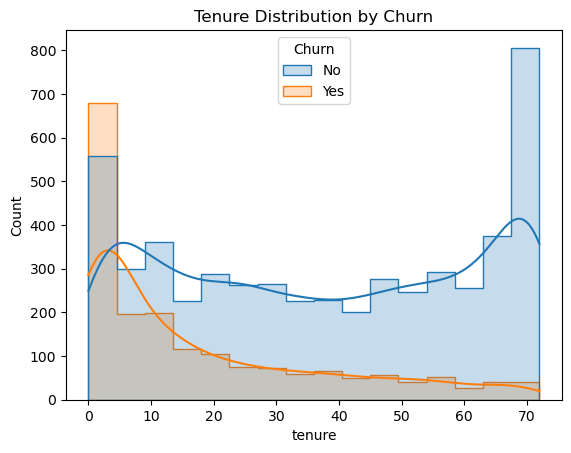

In [13]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, element='step')
plt.title('Tenure Distribution by Churn')
plt.show()


#### Monthly Charges vs Churn

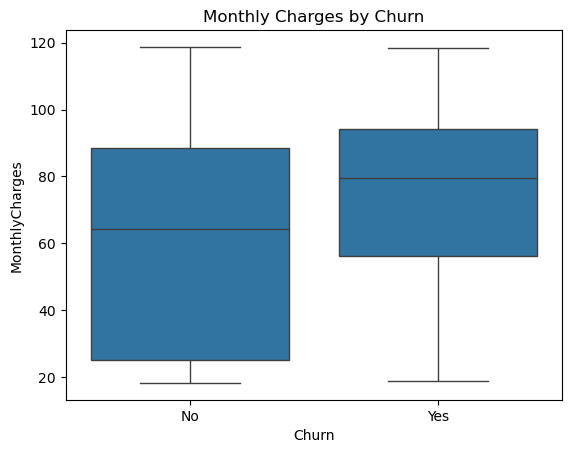

In [14]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()


## Set a Numerical and Categorical Column

In [15]:
## Numerical Column
num_cols=df.dtypes[df.dtypes!="object"].index
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [16]:
## Categorical Column
cat_cols=df.dtypes[df.dtypes=="object"].index
cat_cols

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Box plot for checking outlier in my data 

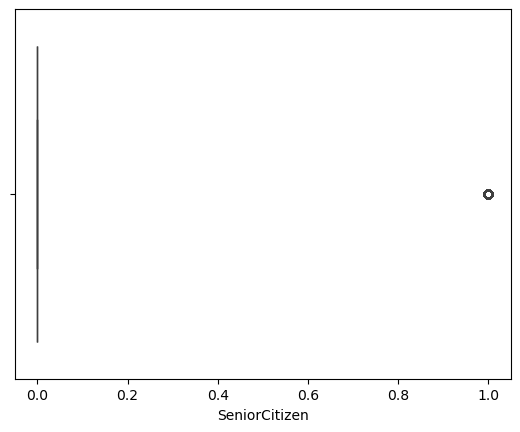

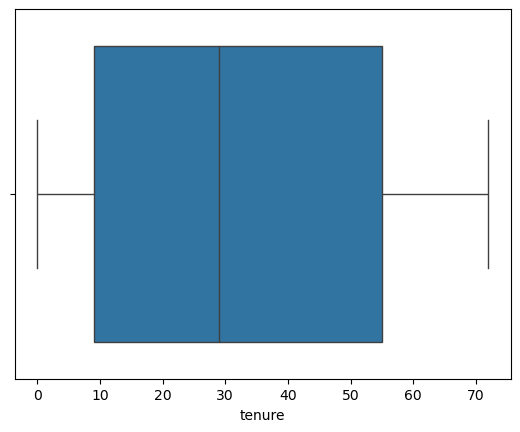

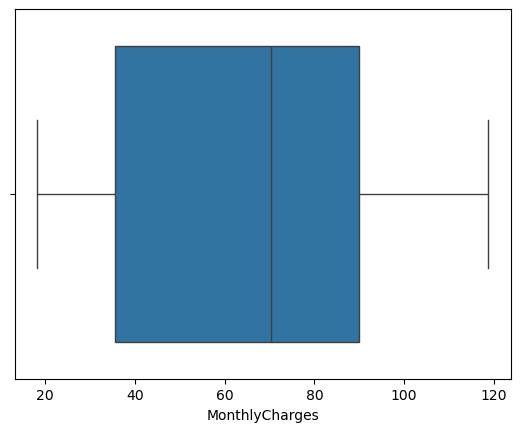

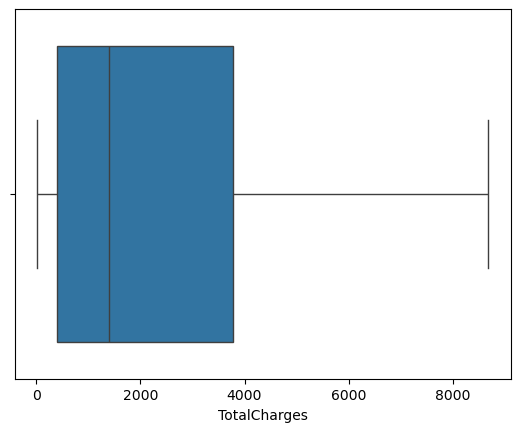

In [17]:
## Box plot for checking outlier in my data 
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.show()

## Correlation matrix

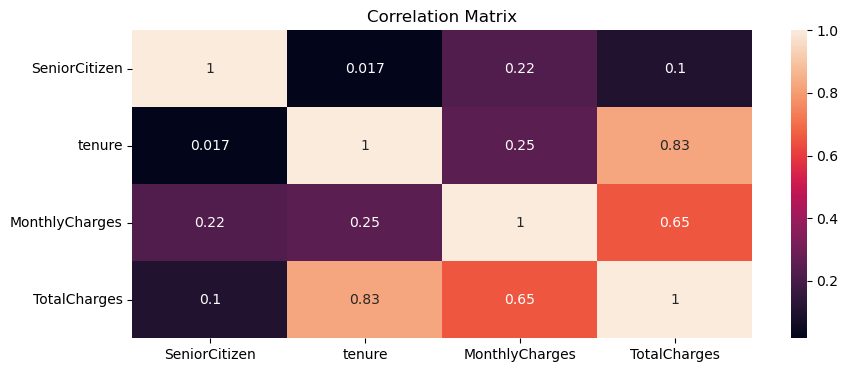

In [18]:
# Correlation matrix
      
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing

In [19]:
# Encode categorical variables
label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [20]:
le

LabelEncoder()

In [21]:
# Features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [22]:
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2           29.85         29.85  
1                    0              3           56.95       1889.50  
2                    1              3           53.85        108.15  
3                    0              0           42.30       1840.75  
4                    1              2           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              3           84.80       1990.50  
7039                 1              1          103.20       7362.90  
7040                 1              2           29.60        346.45  
7041                 1              3           74.40        306.60  
7042                 1              0          105.65       6844.50  

[7043 rows x 19 columns]

## Split data set into train and test set.

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [24]:
# Feature scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Logistic Regression Algorithm

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [26]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [27]:
y_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)

## Display accuracy and performance metrics and Confusion Matrix

In [28]:
# Display accuracy and performance metrics

print(f'Logistic Regression Accuracy: {logreg_accuracy*100:.2f}')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 79.79

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1560
           1       0.63      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113



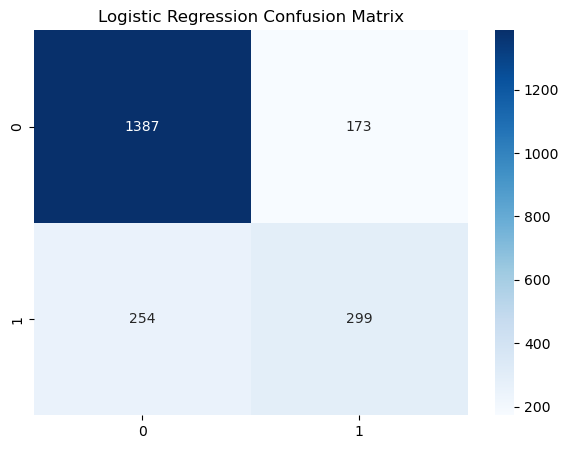

In [29]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# 2. Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
# Create and train the Random Forest model

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
y_pred = rf_model.predict(X_test)
rf_model_accuracy = accuracy_score(y_test, y_pred)

In [33]:
# Display accuracy and performance metrics

print(f'Random Forest Accuracy: {logreg_accuracy*100:.2f}')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred))


Random Forest Accuracy: 79.79

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1560
           1       0.63      0.49      0.55       553

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



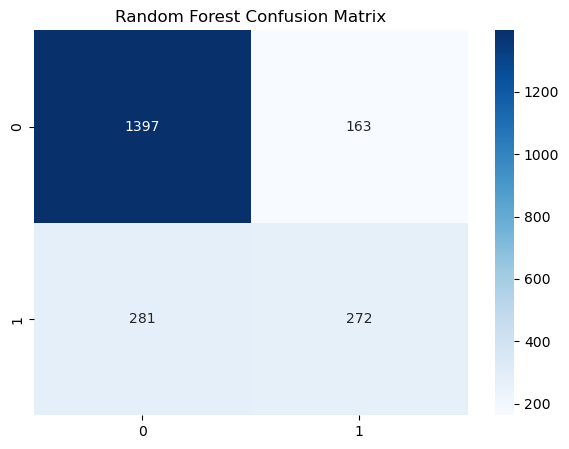

In [34]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

## 3. XGBOOST Model


In [35]:
import xgboost as xgb


In [36]:
#  Initialize XGBoost Model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the Model
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
print(" XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 XGBoost Accuracy: 0.7827733080927591

 Confusion Matrix:
 [[1367  193]
 [ 266  287]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1560
           1       0.60      0.52      0.56       553

    accuracy                           0.78      2113
   macro avg       0.72      0.70      0.71      2113
weighted avg       0.77      0.78      0.78      2113



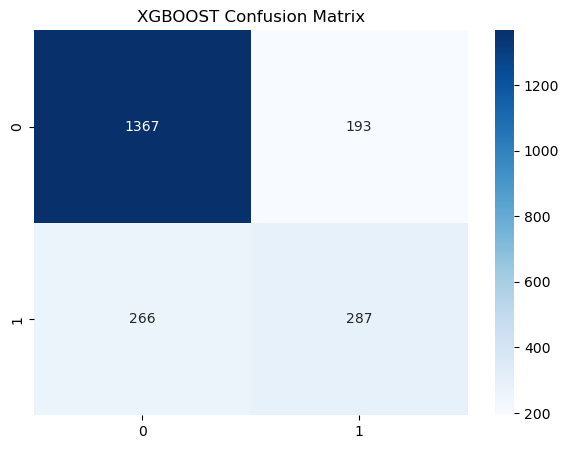

In [37]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBOOST Confusion Matrix')
plt.show()

## 4. Support Vector Machine (SVM) Model

In [41]:
from sklearn.svm import SVC

# Initialize SVM Model
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
  # RBF kernel is default

# Train the Model
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Step 5: Evaluate
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.7463322290582111

 Confusion Matrix:
 [[1157  403]
 [ 133  420]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1560
           1       0.51      0.76      0.61       553

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.76      2113



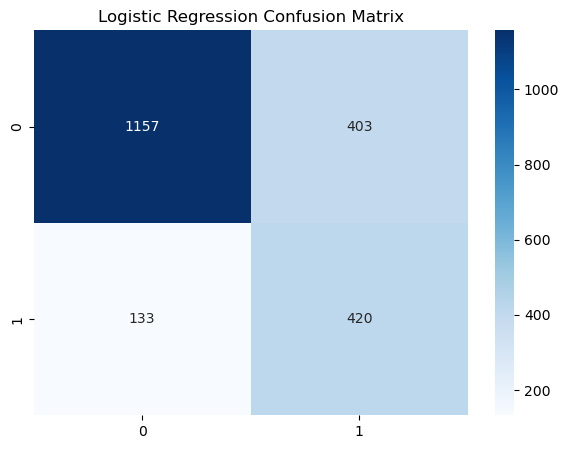

In [42]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## 5. SVM with GridSearchCV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Step 1: Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

# Step 2: Initialize SVC (no need to set hyperparameters yet)
svm = SVC(probability=True, random_state=42)

# Step 3: GridSearchCV setup
grid_search = GridSearchCV(estimator=svm,
                           param_grid=param_grid,
                           scoring='f1',  # optimize for F1-score
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Step 4: Fit on training data
grid_search.fit(X_train, y_train)

# Step 5: Best model & evaluation
best_svm = grid_search.best_estimator_

print(" Best Parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_svm.predict(X_test)

# Evaluate
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
 Best Parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
 Accuracy: 0.7463322290582111
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1560
           1       0.51      0.76      0.61       553

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.75      0.76      2113



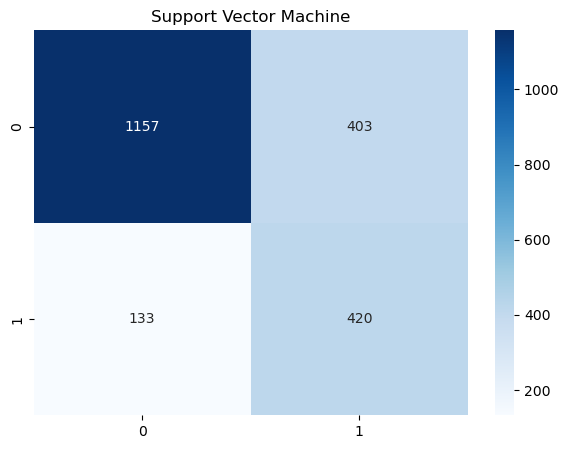

In [44]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine')
plt.show()

## 6. Random Forest With GridSearchCV

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Step 1: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

# Step 2: Initialize the model
rf = RandomForestClassifier(random_state=42)

# Step 3: Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf,
                               param_grid=param_grid,
                               scoring='f1',  # optimize for churn F1-score
                               cv=5,
                               n_jobs=-1,
                               verbose=1)

# Step 4: Fit the model
grid_search_rf.fit(X_train, y_train)

# Step 5: Best model
best_rf = grid_search_rf.best_estimator_
print("Best Parameters:", grid_search_rf.best_params_)

# Step 6: Evaluate on test data
y_pred_rf = best_rf.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

 Accuracy: 0.7785139611926172

 Confusion Matrix:
 [[1245  315]
 [ 153  400]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1560
           1       0.56      0.72      0.63       553

    accuracy                           0.78      2113
   macro avg       0.72      0.76      0.74      2113
weighted avg       0.80      0.78      0.79      2113



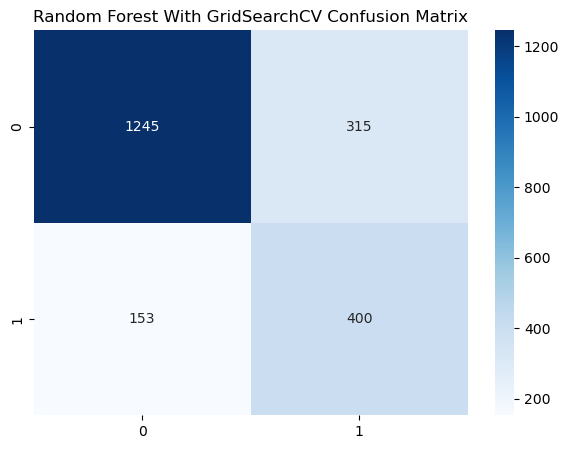

In [46]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest With GridSearchCV Confusion Matrix')
plt.show()

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


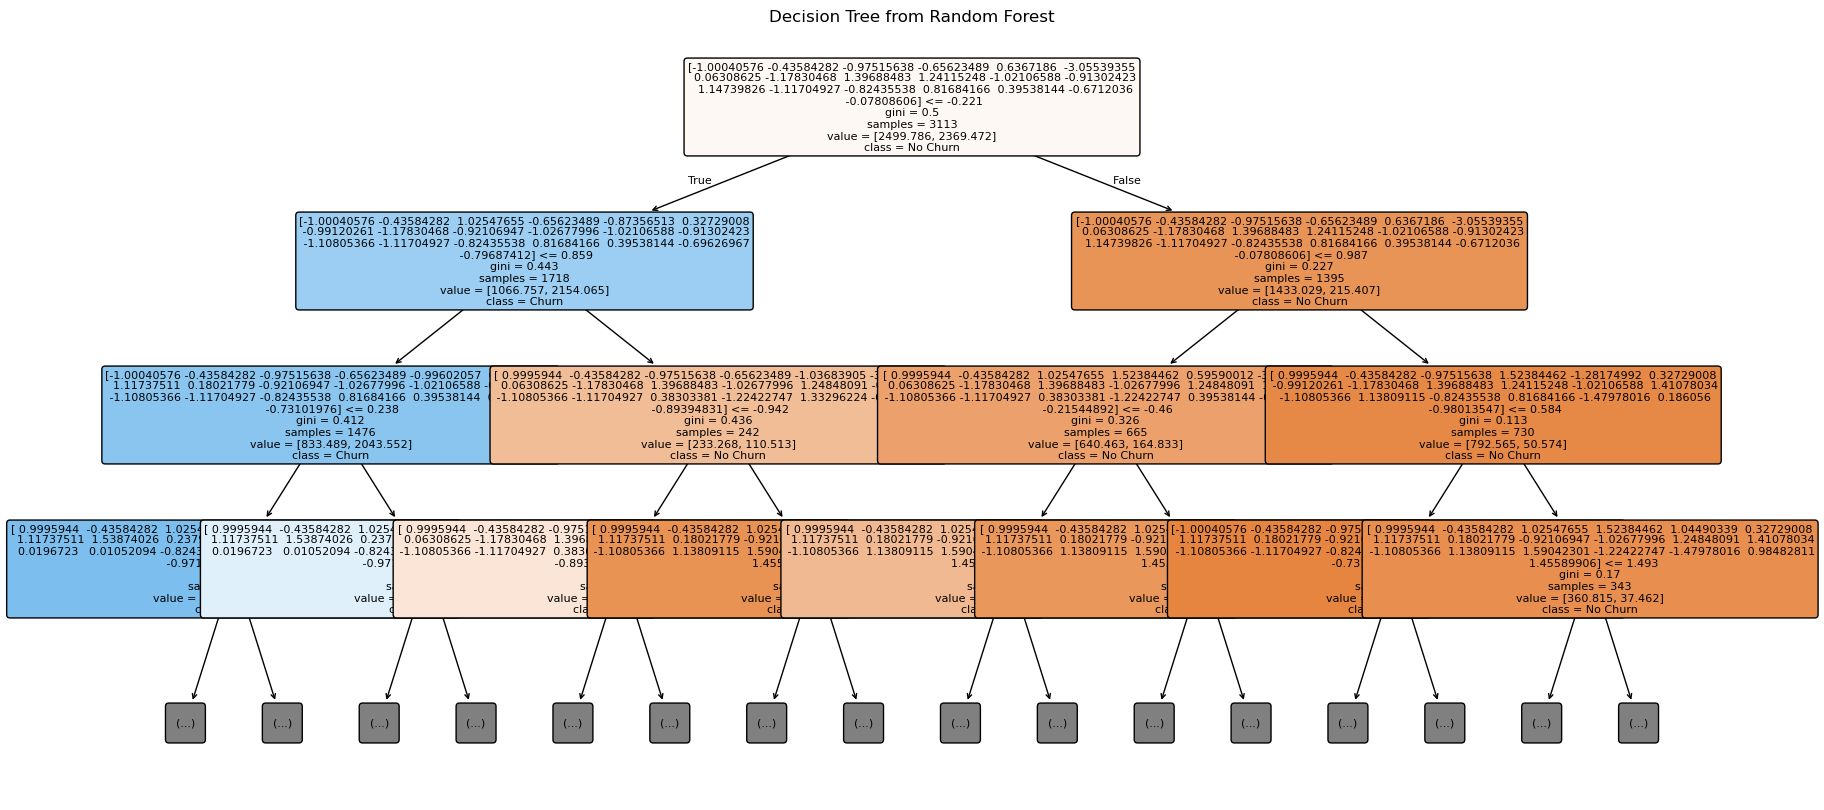

In [48]:
# Pick one decision tree (e.g., the 1st tree)
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], 
          feature_names=X_train,  # your training columns
          class_names=['No Churn', 'Churn'],
          filled=True,
          rounded=True,
          fontsize=8,
          max_depth=3)
plt.title("Decision Tree from Random Forest")
plt.show()


## 7. Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize the model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Use 'balanced' to improve churn detection

# Step 2: Train the model
dt_model.fit(X_train, y_train)

# Step 3: Predict
y_pred = dt_model.predict(X_test)

# Step 4: Evaluate
print(" Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))



 Decision Tree Accuracy: 0.7297681022243256

 Confusion Matrix:
 [[1266  294]
 [ 277  276]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1560
           1       0.48      0.50      0.49       553

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113



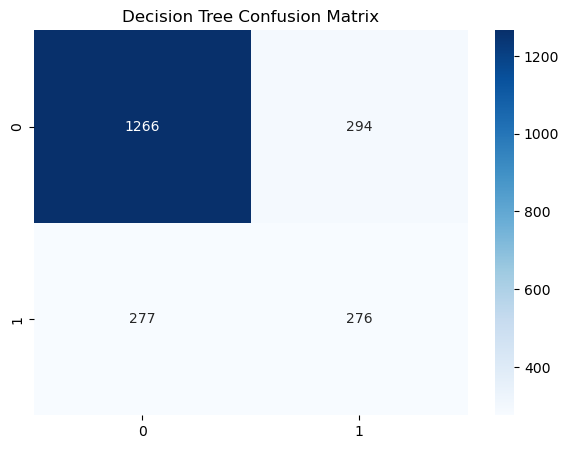

In [50]:
# Confusion Matrix

plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Evaluation and comparison

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model and return results for churn class (label = 1)
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (Churn)': precision_score(y_test, y_pred, pos_label=1),
        'Recall (Churn)': recall_score(y_test, y_pred, pos_label=1),
        'F1-Score (Churn)': f1_score(y_test, y_pred, pos_label=1)
    }

# Example: call the function for each model
results = []
results.append(evaluate_model(logreg, X_test, y_test, 'Logistic Regression'))
results.append(evaluate_model(rf_model, X_test, y_test, 'Random Forest'))
results.append(evaluate_model(best_rf, X_test, y_test, 'Random Forest (GridSearch)'))
results.append(evaluate_model(xgb_model, X_test, y_test, 'XGBoost'))
results.append(evaluate_model(svm_model, X_test, y_test, 'SVM'))
results.append(evaluate_model(best_svm, X_test, y_test, 'SVM (GridSearch)'))
results.append(evaluate_model(dt_model, X_test, y_test, 'Decision Tree'))

# Create DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

results_df.sort_values(by=['F1-Score (Churn)'], ascending=False)


Model  Accuracy  Precision (Churn)  Recall (Churn)  \
2  Random Forest (GridSearch)  0.778514           0.559441        0.723327   
4                         SVM  0.746332           0.510328        0.759494   
5            SVM (GridSearch)  0.746332           0.510328        0.759494   
0         Logistic Regression  0.797918           0.633475        0.540687   
3                     XGBoost  0.782773           0.597917        0.518987   
1               Random Forest  0.789872           0.625287        0.491863   
6               Decision Tree  0.729768           0.484211        0.499096   

   F1-Score (Churn)  
2          0.630915  
4          0.610465  
5          0.610465  
0          0.583415  
3          0.555663  
1          0.550607  
6          0.491541

## Conclusion :
    * `We can conclude from the above tabulated result that Random Forest (GridSearchCV) is the best model because`

1) Highest F1-Score for churners (63.09%) – best balance between recall & precision

2) High Recall (72%) – catches almost 3 out of 4 churners

3) Good overall accuracy (~78%)

4) Random Forests are robust, interpretable, and work well with categorical + numerical data

## Get the predictions for the new data.
* I am Creating a manual input function to predict new churn cases 

## manual input 

In [68]:
import pandas as pd

def predict_churn_manually(model, scaler, feature_columns):
    print("\n Please enter the customer details below:")

    customer = {
        'gender': input("Gender (Male/Female): "),
        'SeniorCitizen': int(input("Senior Citizen (0 or 1): ")),
        'Partner': input("Partner (Yes/No): "),
        'Dependents': input("Dependents (Yes/No): "),
        'tenure': float(input("Tenure (e.g., 12): ")),
        'PhoneService': input("Phone Service (Yes/No): "),
        'MultipleLines': input("Multiple Lines (Yes/No/No phone service): "),
        'InternetService': input("Internet Service (DSL/Fiber optic/No): "),
        'OnlineSecurity': input("Online Security (Yes/No/No internet service): "),
        'OnlineBackup': input("Online Backup (Yes/No/No internet service): "),
        'DeviceProtection': input("Device Protection (Yes/No/No internet service): "),
        'TechSupport': input("Tech Support (Yes/No/No internet service): "),
        'StreamingTV': input("Streaming TV (Yes/No/No internet service): "),
        'StreamingMovies': input("Streaming Movies (Yes/No/No internet service): "),
        'Contract': input("Contract (Month-to-month/One year/Two year): "),
        'PaperlessBilling': input("Paperless Billing (Yes/No): "),
        'PaymentMethod': input("Payment Method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)): "),
        'MonthlyCharges': float(input("Monthly Charges (e.g., 70.5): ")),
        'TotalCharges': float(input("Total Charges (e.g., 1023.5): "))
    }

    df = pd.DataFrame([customer])

    categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

    numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

    # One-hot encode
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    # Align with training features
    df_encoded = df_encoded.reindex(columns=feature_columns, fill_value=0)

    # Scale
    df_encoded = pd.DataFrame(scaler.transform(df_encoded), columns=feature_columns)

    # Predict
    prediction = model.predict(df_encoded)[0]
    probability = model.predict_proba(df_encoded)[0][1]

    print("\n Prediction Result:")
    print("Churn:", "Yes" if prediction == 1 else "No")
    print(f"Probability of churn: {probability:.2%}")


In [99]:
# Get your feature names before scaling
feature_columns = X_train.tolist()  # IMPORTANT: BEFORE scaling!


## Calling Our Best model to predict

In [70]:
predict_churn_manually(best_rf, scaler, feature_columns)


 Please enter the customer details below:


Gender (Male/Female):  Male
Senior Citizen (0 or 1):  0
Partner (Yes/No):  Yes
Dependents (Yes/No):  Yes
Tenure (e.g., 12):  15
Phone Service (Yes/No):  Yes
Multiple Lines (Yes/No/No phone service):  Yes
Internet Service (DSL/Fiber optic/No):  Fiber optic
Online Security (Yes/No/No internet service):  Yes
Online Backup (Yes/No/No internet service):  Yes
Device Protection (Yes/No/No internet service):  Yes
Tech Support (Yes/No/No internet service):  Yes
Streaming TV (Yes/No/No internet service):  Yes
Streaming Movies (Yes/No/No internet service):  Yes
Contract (Month-to-month/One year/Two year):  Month-to-month
Paperless Billing (Yes/No):  Yes
Payment Method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)):  Bank transfer (automatic)
Monthly Charges (e.g., 70.5):  90
Total Charges (e.g., 1023.5):  1524



 Prediction Result:
Churn: Yes
Probability of churn: 50.02%
